In [55]:
data = [[10,'A'], [11,'B'], [12,'C'], [13, 'D']]

In [57]:
df2 = pd.DataFrame(data, columns=['Index', 'Column1'])

In [58]:
df2

,Index,Column1
0,10,A
1,11,B
2,12,C
3,13,D


In [63]:
df2.loc[1]

Index      11
Column1     B
Name: 1, dtype: object

In [62]:
df2.iloc[2]

Index      12
Column1     C
Name: 2, dtype: object

In [64]:
df2.loc[1]+df2.iloc[2]

Index      23
Column1    BC
dtype: object

In [65]:
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.impute import SimpleImputer
from scipy.stats import zscore

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [66]:
df = pd.read_csv('PenguinsAnalysis.csv')

In [67]:
df.head()

,species,island,culmen length,culmen depth,flipper length,body mass,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,MALE
1,Adelie,Torgersen,39.5,17.4,186,3800,FEMALE
2,Adelie,Torgersen,40.3,18.0,195,3250,FEMALE
3,Adelie,Torgersen,36.7,19.3,193,3450,FEMALE
4,Adelie,Torgersen,39.3,20.6,190,3650,MALE


In [68]:
df.shape

(333, 7)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   species         333 non-null    object 
 1   island          333 non-null    object 
 2   culmen length   333 non-null    float64
 3   culmen depth    333 non-null    float64
 4   flipper length  333 non-null    int64  
 5   body mass       333 non-null    int64  
 6   sex             333 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 18.3+ KB


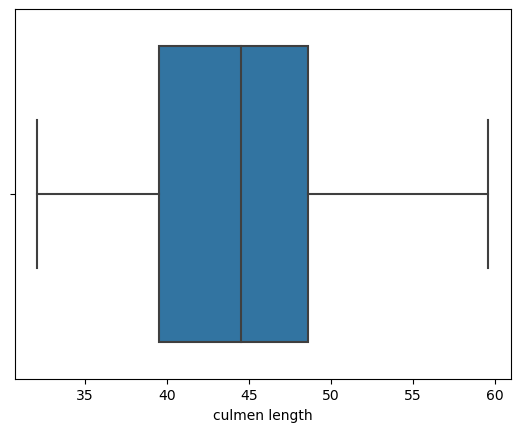

In [70]:
sns.boxplot(data=df, x=df['culmen length']);

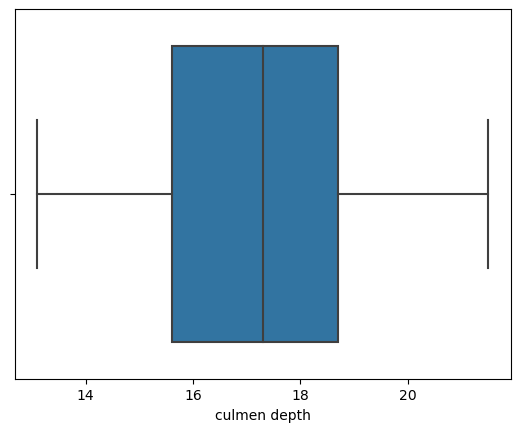

In [71]:
sns.boxplot(data=df, x=df['culmen depth']);

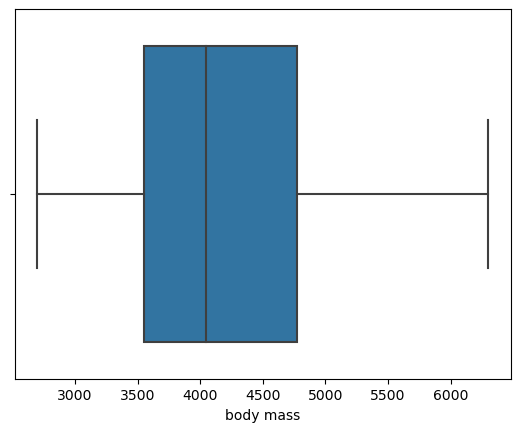

In [72]:
sns.boxplot(data=df, x=df['body mass']);

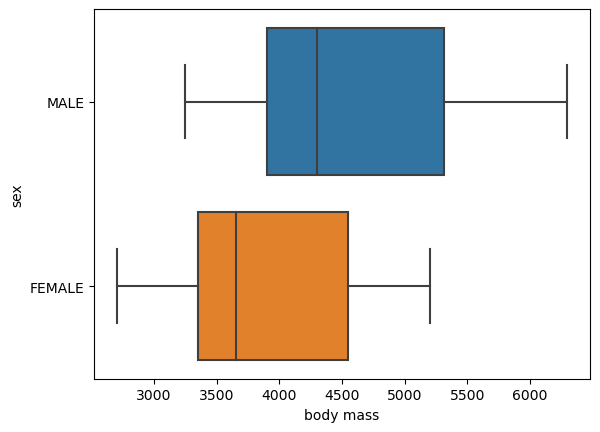

In [73]:
sns.boxplot(data=df, x=df['body mass'], y=df['sex']);

<AxesSubplot: xlabel='species', ylabel='count'>

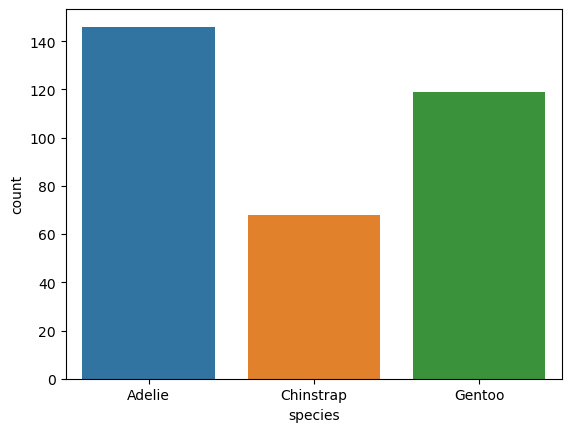

In [74]:
sns.countplot(data=df, x='species')

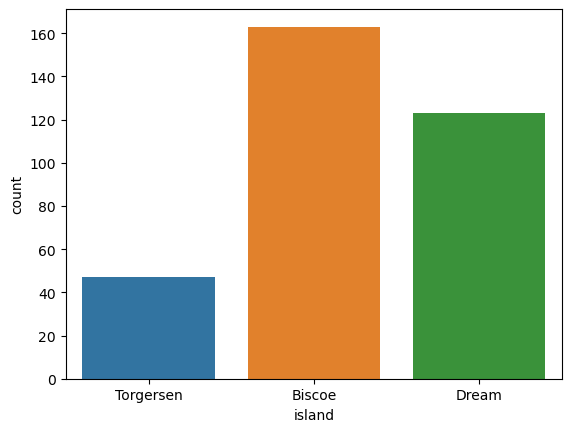

In [75]:
sns.countplot(data =df, x='island');

In [31]:
df.corr()

,culmen length,culmen depth,flipper length,body mass
culmen length,1.000000,-0.228626,0.653096,0.589451
culmen depth,-0.228626,1.000000,-0.577792,-0.472016
flipper length,0.653096,-0.577792,1.000000,0.872979
body mass,0.589451,-0.472016,0.872979,1.000000


In [38]:
df.loc[12]

species              Adelie
island            Torgersen
culmen length          42.5
culmen depth           20.7
flipper length          197
body mass              4500
sex                    MALE
Name: 12, dtype: object

In [40]:
df.head(13)

,species,island,culmen length,culmen depth,flipper length,body mass,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,MALE
1,Adelie,Torgersen,39.5,17.4,186,3800,FEMALE
2,Adelie,Torgersen,40.3,18.0,195,3250,FEMALE
3,Adelie,Torgersen,36.7,19.3,193,3450,FEMALE
4,Adelie,Torgersen,39.3,20.6,190,3650,MALE
5,Adelie,Torgersen,38.9,17.8,181,3625,FEMALE
6,Adelie,Torgersen,39.2,19.6,195,4675,MALE
7,Adelie,Torgersen,41.1,17.6,182,3200,FEMALE
8,Adelie,Torgersen,38.6,21.2,191,3800,MALE
9,Adelie,Torgersen,34.6,21.1,198,4400,MALE


In [77]:
df[df['sex']=='MALE'].groupby('species')['body mass'].mean()

species
Adelie       4043.493151
Chinstrap    3938.970588
Gentoo       5484.836066
Name: body mass, dtype: float64

In [94]:
df[(df['sex']=='FEMALE') & (df['species']=='Gentoo') & (df['island']=='Biscoe')]['culmen depth'].mean()

14.237931034482758

In [96]:
df[df['sex']=='FEMALE']['culmen depth'].sort_values(ascending=False)

108    20.7
205    19.4
3      19.3
33     19.3
17     19.2
       ... 
230    13.5
222    13.4
261    13.3
214    13.2
238    13.1
Name: culmen depth, Length: 165, dtype: float64

In [99]:
df[(df['sex']=='MALE') & (df['species']=='Adelie')].groupby('island')['culmen depth'].mean()

island
Biscoe       19.036364
Dream        18.839286
Torgersen    19.391304
Name: culmen depth, dtype: float64

In [88]:
df[df['sex']=='FEMALE'].sort_values(by='flipper length', ascending=False).head(10)

,species,island,culmen length,culmen depth,flipper length,body mass,sex
309,Gentoo,Biscoe,46.9,14.6,222,4875,FEMALE
247,Gentoo,Biscoe,49.1,14.8,220,5150,FEMALE
280,Gentoo,Biscoe,43.5,14.2,220,4700,FEMALE
277,Gentoo,Biscoe,45.8,14.2,219,4700,FEMALE
312,Gentoo,Biscoe,48.5,15.0,219,4850,FEMALE
302,Gentoo,Biscoe,47.5,15.0,218,4950,FEMALE
298,Gentoo,Biscoe,43.4,14.4,218,4600,FEMALE
258,Gentoo,Biscoe,43.6,13.9,217,4900,FEMALE
325,Gentoo,Biscoe,46.2,14.1,217,4375,FEMALE
267,Gentoo,Biscoe,46.5,14.4,217,4900,FEMALE
